# Introduction

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Data source: [Company Bankruptcy Prediction](https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction)

## Metadata

Version 2: Updated column names and description to make the data easier to understand.

* Bankrupt?: Class label
* ROA(C) before interest and depreciation before interest: Return On Total Assets(C)
* ROA(A) before interest and % after tax: Return On Total Assets(A)
* ROA(B) before interest and depreciation after tax: Return On Total Assets(B)
* Operating Gross Margin: Gross Profit/Net Sales
* Realized Sales Gross Margin: Realized Gross Profit/Net Sales
* Operating Profit Rate: Operating Income/Net Sales
* Pre-tax net Interest Rate: Pre-Tax Income/Net Sales
* After-tax net Interest Rate: Net Income/Net Sales
* Non-industry income and expenditure/revenue: Net Non-operating Income Ratio
* Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales
* Operating Expense Rate: Operating Expenses/Net Sales
* Research and development expense rate: (Research and Development Expenses)/Net Sales
* Cash flow rate: Cash Flow from Operating/Current Liabilities
* Interest-bearing debt interest rate: Interest-bearing Debt/Equity
* Tax rate (A): Effective Tax Rate
* Net Value Per Share (B): Book Value Per Share(B)
* Net Value Per Share (A): Book Value Per Share(A)
* Net Value Per Share (C): Book Value Per Share(C)
* Persistent EPS in the Last Four Seasons: EPS-Net Income
* Cash Flow Per Share
* Revenue Per Share (Yuan ¥): Sales Per Share
* Operating Profit Per Share (Yuan ¥): Operating Income Per Share
* Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share
* Realized Sales Gross Profit Growth Rate
* Operating Profit Growth Rate: Operating Income Growth
* After-tax Net Profit Growth Rate: Net Income Growth
* Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth
* Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
* Total Asset Growth Rate: Total Asset Growth
* Net Value Growth Rate: Total Equity Growth
* Total Asset Return Growth Rate Ratio: Return on Total Asset Growth
* Cash Reinvestment %: Cash Reinvestment Ratio
* Current Ratio
* Quick Ratio: Acid Test
* Interest Expense Ratio: Interest Expenses/Total Revenue
* Total debt/Total net worth: Total Liability/Equity Ratio
* Debt ratio %: Liability/Total Assets
* Net worth/Assets: Equity/Total Assets
* Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets
* Borrowing dependency: Cost of Interest-bearing Debt
* Contingent liabilities/Net worth: Contingent Liability/Equity
* Operating profit/Paid-in capital: Operating Income/Capital
* Net profit before tax/Paid-in capital: Pretax Income/Capital
* Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity
* Total Asset Turnover
* Accounts Receivable Turnover
* Average Collection Days: Days Receivable Outstanding
* Inventory Turnover Rate (times)
* Fixed Assets Turnover Frequency
* Net Worth Turnover Rate (times): Equity Turnover
* Revenue per person: Sales Per Employee
* Operating profit per person: Operation Income Per Employee
* Allocation rate per person: Fixed Assets Per Employee
* Working Capital to Total Assets
* Quick Assets/Total Assets
* Current Assets/Total Assets
* Cash/Total Assets
* Quick Assets/Current Liability
* Cash/Current Liability
* Current Liability to Assets
* Operating Funds to Liability
* Inventory/Working Capital
* Inventory/Current Liability
* Current Liabilities/Liability
* Working Capital/Equity
* Current Liabilities/Equity
* Long-term Liability to Current Assets
* Retained Earnings to Total Assets
* Total income/Total expense
* Total expense/Assets
* Current Asset Turnover Rate: Current Assets to Sales
* Quick Asset Turnover Rate: Quick Assets to Sales
* Working capitcal Turnover Rate: Working Capital to Sales
* Cash Turnover Rate: Cash to Sales
* Cash Flow to Sales
* Fixed Assets to Assets
* Current Liability to Liability
* Current Liability to Equity
* Equity to Long-term Liability
* Cash Flow to Total Assets
* Cash Flow to Liability
* CFO to Assets
* Cash Flow to Equity
* Current Liability to Current Assets
* Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise
* Net Income to Total Assets
* Total assets to GNP price
* No-credit Interval
* Gross Profit to Sales
* Net Income to Stockholder's Equity
* Liability to Equity
* Degree of Financial Leverage (DFL)
* Interest Coverage Ratio (Interest expense to EBIT)
* Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
* Equity to Liability

# Import Libraries

In [ ]:
!pip install skope-rules
!pip install eli5
!pip install scikit-plot
!pip install shap
!pip install lime
!pip install dalex
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
pd.set_option("display.max_columns",None)

import numpy as np
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette("bright")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
palette = {0: 'tab:blue',1: 'tab:orange'}

import plotly.express as px
import pickle
from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import *
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score
import sklearn.metrics as metrics

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_validate, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import *
from sklearn import svm,tree
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn import model_selection

# load rulefit model
import six
import sys
sys.modules['sklearn.externals.six'] = six
from skrules import SkopeRules

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from yellowbrick.classifier import DiscriminationThreshold 

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load eli5
import eli5

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer 

# import dalex to explain complex model
import dalex as dx

# for Q-Q plots
import scipy.stats as stats
from feature_engine.outliers import Winsorizer
from scipy.stats import chi2_contingency

import os, random
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

# Data Inspection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd 'drive/My Drive/Colab Notebooks/dataset'

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/dataset'
/content/drive/My Drive/Colab Notebooks/dataset


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Company Bankruptcy Prediction.csv')

In [ ]:
data

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

# Data Preparation

### Missing Values Handling

In [ ]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

The dataset has no missing values.

In [ ]:
# Data Profilling
print("="*10,"Data Profilling","="*10)

# Data Shape
print("Data shape :", data.shape)
print("")

# Data Info
print("Data info :")
print(data.info())
print("")

# Data duplication
print("Data duplication :")
print(data.duplicated().sum())
print("")

========== Data Profilling ==========
Data shape : (6819, 96)

Data info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate    

### Data Transformation

In [ ]:
# Change Definition
data['Bankrupt?'] = data['Bankrupt?'].replace({0:'No', 1:'Yes'})

In [ ]:
data

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          Yes                                           0.370594          
1          Yes                                           0.464291          
2          Yes                                           0.426071          
3          Yes                                           0.399844          
4          Yes                                           0.465022          
...        ...                                                ...          
6814        No                                           0.493687          
6815        No                                           0.475162          
6816        No                                           0.472725          
6817        No                                           0.506264          
6818        No                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0.809331   


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   object 
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
# extracting categorical columns
cat = data.select_dtypes(include = ['object'])

# printing unique values of each column
for col in cat.columns:
    print(f"{col}: \n{cat[col].unique()}\n")

Bankrupt?: 
['Yes' 'No']



##  Data Correlation

In [ ]:
data.describe().T

count      mean  \
 ROA(C) before interest and depreciation before...  6819.0  0.505180   
 ROA(A) before interest and % after tax             6819.0  0.558625   
 ROA(B) before interest and depreciation after tax  6819.0  0.553589   
 Operating Gross Margin                             6819.0  0.607948   
 Realized Sales Gross Margin                        6819.0  0.607929   
...                                                    ...       ...   
 Liability to Equity                                6819.0  0.280365   
 Degree of Financial Leverage (DFL)                 6819.0  0.027541   
 Interest Coverage Ratio (Interest expense to E...  6819.0  0.565358   
 Net Income Flag                                    6819.0  1.000000   
 Equity to Liability                                6819.0  0.047578   

                                                         std  min       25%  \
 ROA(C) before interest and depreciation before...  0.060686  0.0  0.476527   
 ROA(A) before interest and % after tax             0.065620  0.0  0.535543   
 ROA(B) before interest and depreciation after tax  0.061595  0.0  0.527277   
 Operating Gross Margin                             0.016934  0.0  0.600445   
 Realized Sales Gross Margin                        0.016916  0.0  0.600434   
...                                                      ...  ...       ...   
 Liability to Equity                                0.014463  0.0  0.276944   
 Degree of Financial Leverage (DFL)                 0.015668  0.0  0.026791   
 Interest Coverage Ratio (Interest expense to E...  0.013214  0.0  0.565158   
 Net Income Flag                                    0.000000  1.0  1.000000   
 Equity to Liability                                0.050014  0.0  0.024477   

                                                         50%       75%  max  
 ROA(C) before interest and depreciation before...  0.502706  0.535563  1.0  
 ROA(A) before interest and % after tax             0.559802  0.589157  1.0  
 ROA(B) before interest and depreciation after tax  0.552278  0.584105  1.0  
 Operating Gross Margin                             0.605997  0.613914  1.0  
 Realized Sales Gross Margin                        0.605976  0.613842  1.0  
...                                                      ...       ...  ...  
 Liability to Equity                                0.278778  0.281449  1.0  
 Degree of Financial Leverage (DFL)                 0.026808  0.026913  1.0  
 Interest Coverage Ratio (Interest expense to E...  0.565252  0.565725  1.0  
 Net Income Flag                                    1.000000  1.000000  1.0  
 Equity to Liability                                0.033798  0.052838  1.0  

[95 rows x 8 columns]

# Exploratory Data Analysis

## Frequency Distribution: Categorical Variables

In [ ]:
Bankrupt = data['Bankrupt?'].value_counts()

fig = px.pie(Bankrupt, 
             values = Bankrupt.values, 
             names = Bankrupt.index)
fig.update_traces(textposition='inside', textinfo='percent+label+value', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show(figsize=(3,3))

## Frequency Distribution: Continuous Variables

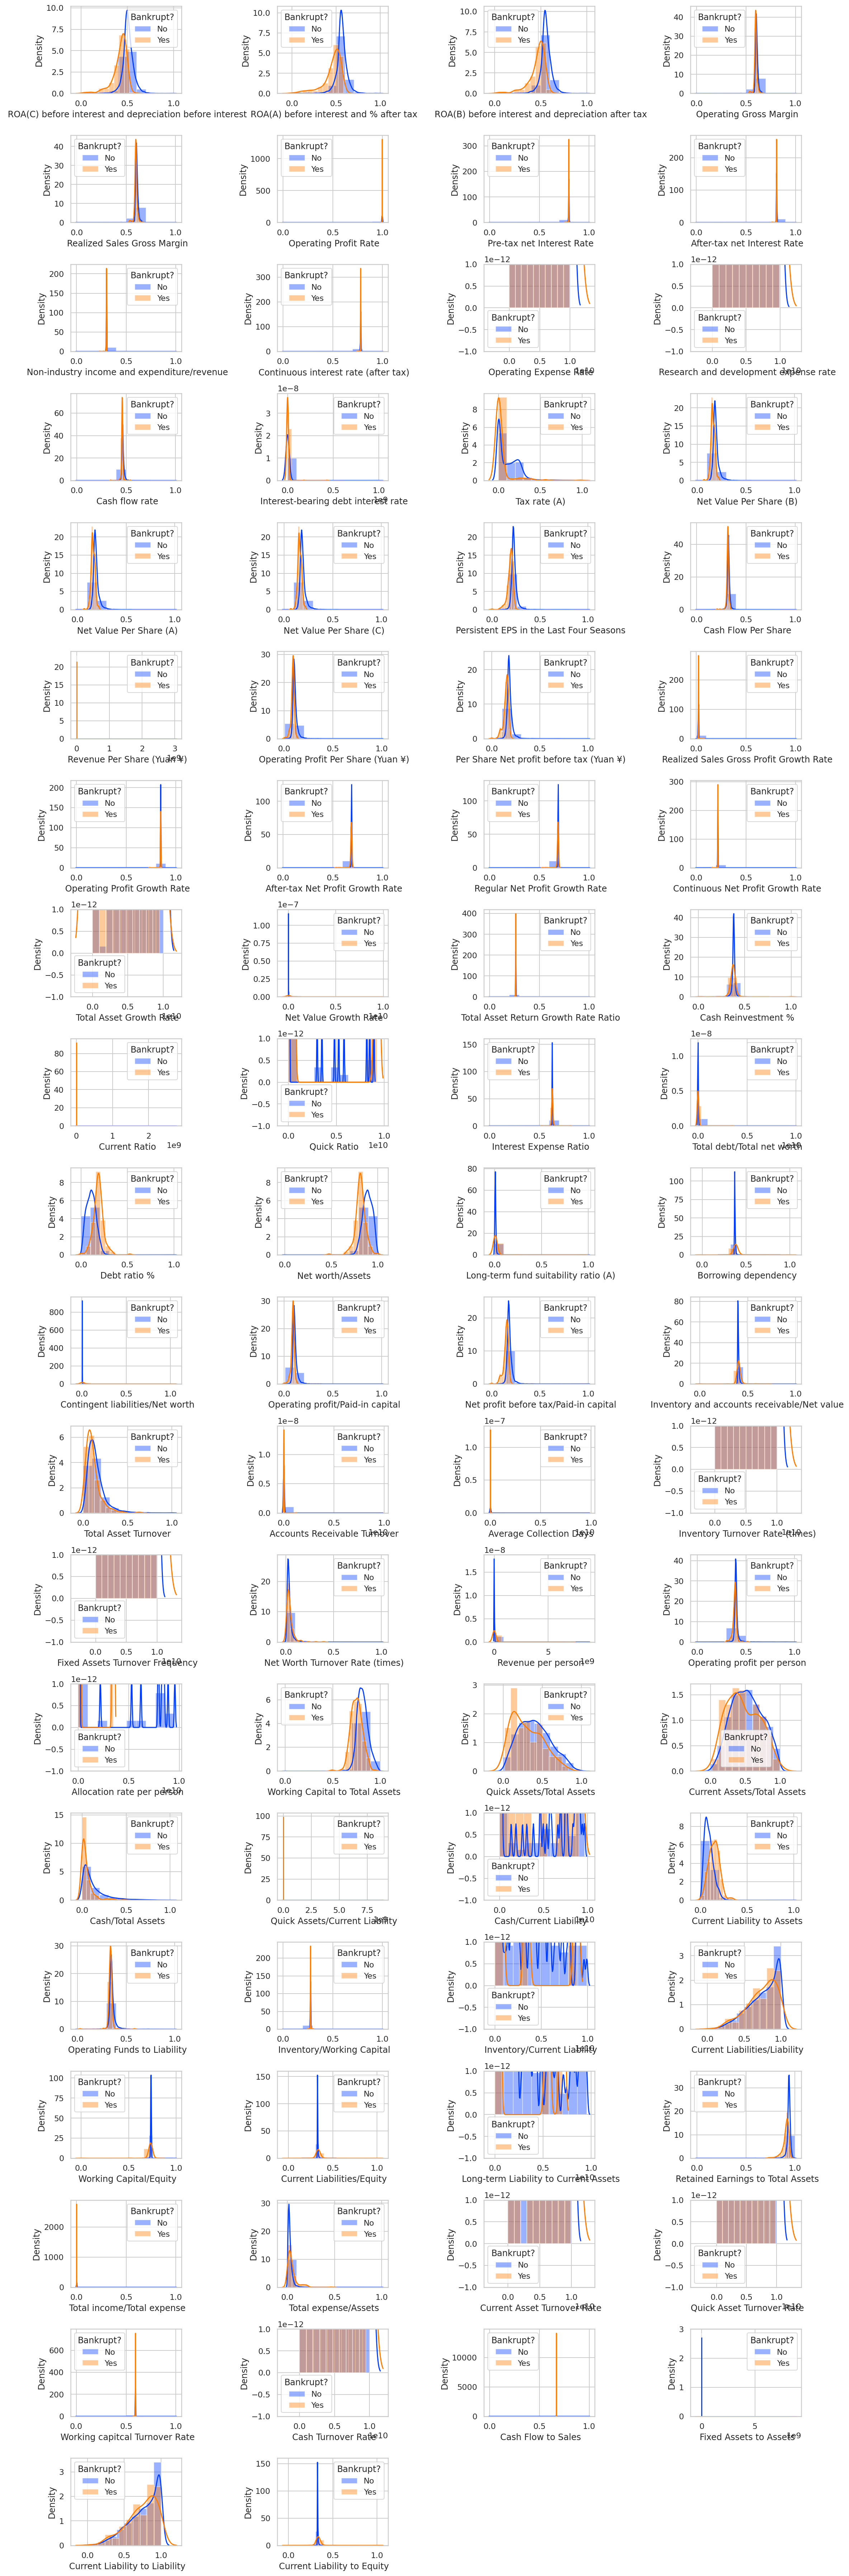

In [ ]:
data_grouped = data.groupby(by='Bankrupt?')
fig, axs = plt.subplots(nrows=20, ncols=4, figsize=(16,50))
titles = list(data.select_dtypes(exclude=['object']))

ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.distplot(data_grouped.get_group('No')[title], bins=10, ax=ax,label='No')
    sns.distplot(data_grouped.get_group('Yes')[title], bins=10, ax=ax,label='Yes')
    ax.legend(title='Bankrupt?')

axs.flat[-1].remove()
axs.flat[-2].remove()
fig.tight_layout()

## Box Plots : Outlier Detection

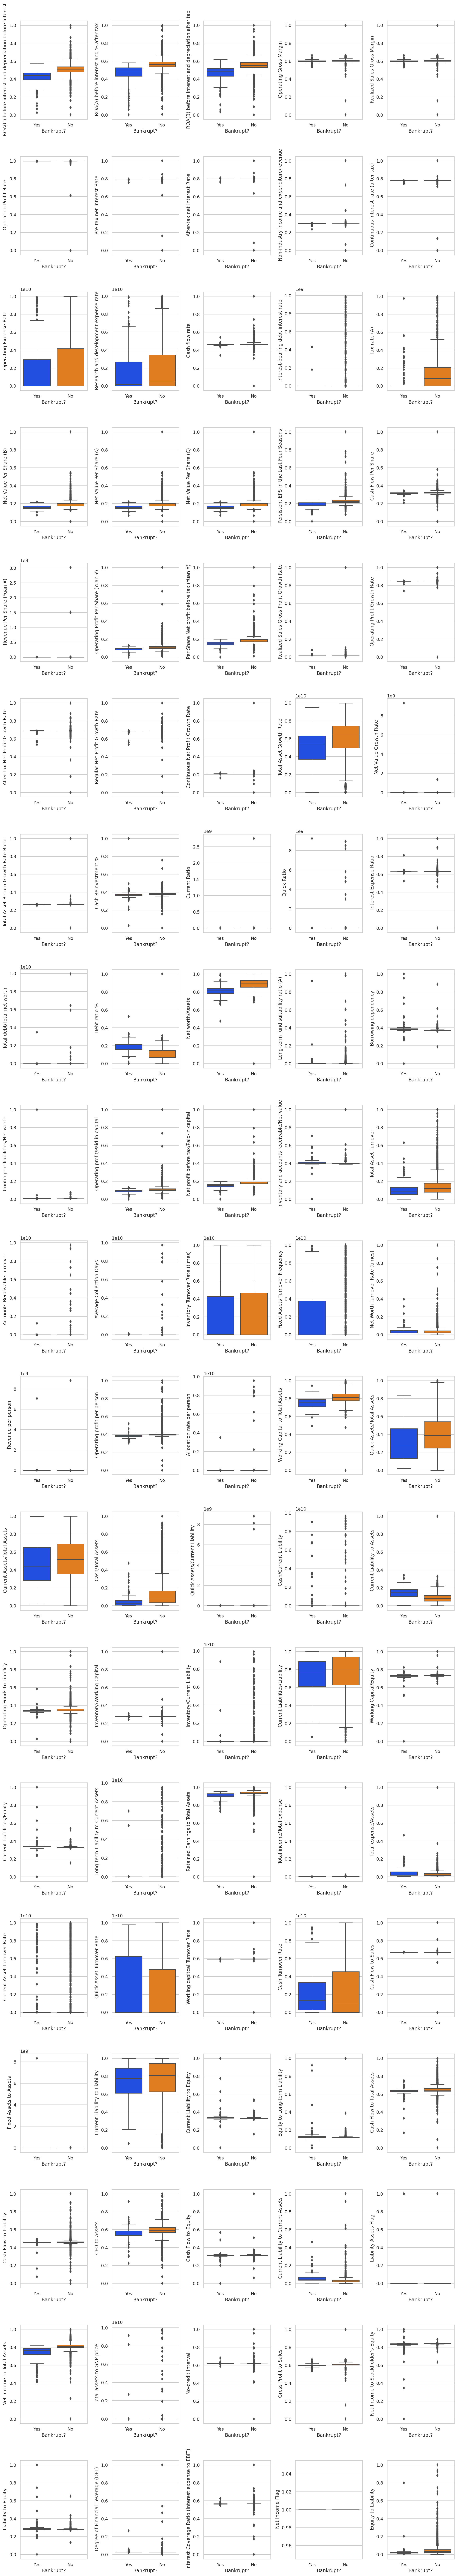

In [ ]:
fig, axs = plt.subplots(nrows=19, ncols=5, figsize=(16,90))
titles = list(data.select_dtypes(exclude=['object']))

ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.boxplot(x='Bankrupt?', y=title, data=data, ax=ax)
fig.tight_layout()

In [ ]:
# Removing Outliers on train data
titles = data.select_dtypes(exclude=['object'])
for col in titles:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  Lwishker = Q1 - 1.5 * IQR
  Uwishker = Q3 + 1.5 * IQR
  data[col] = data[col].clip(Lwishker, Uwishker)

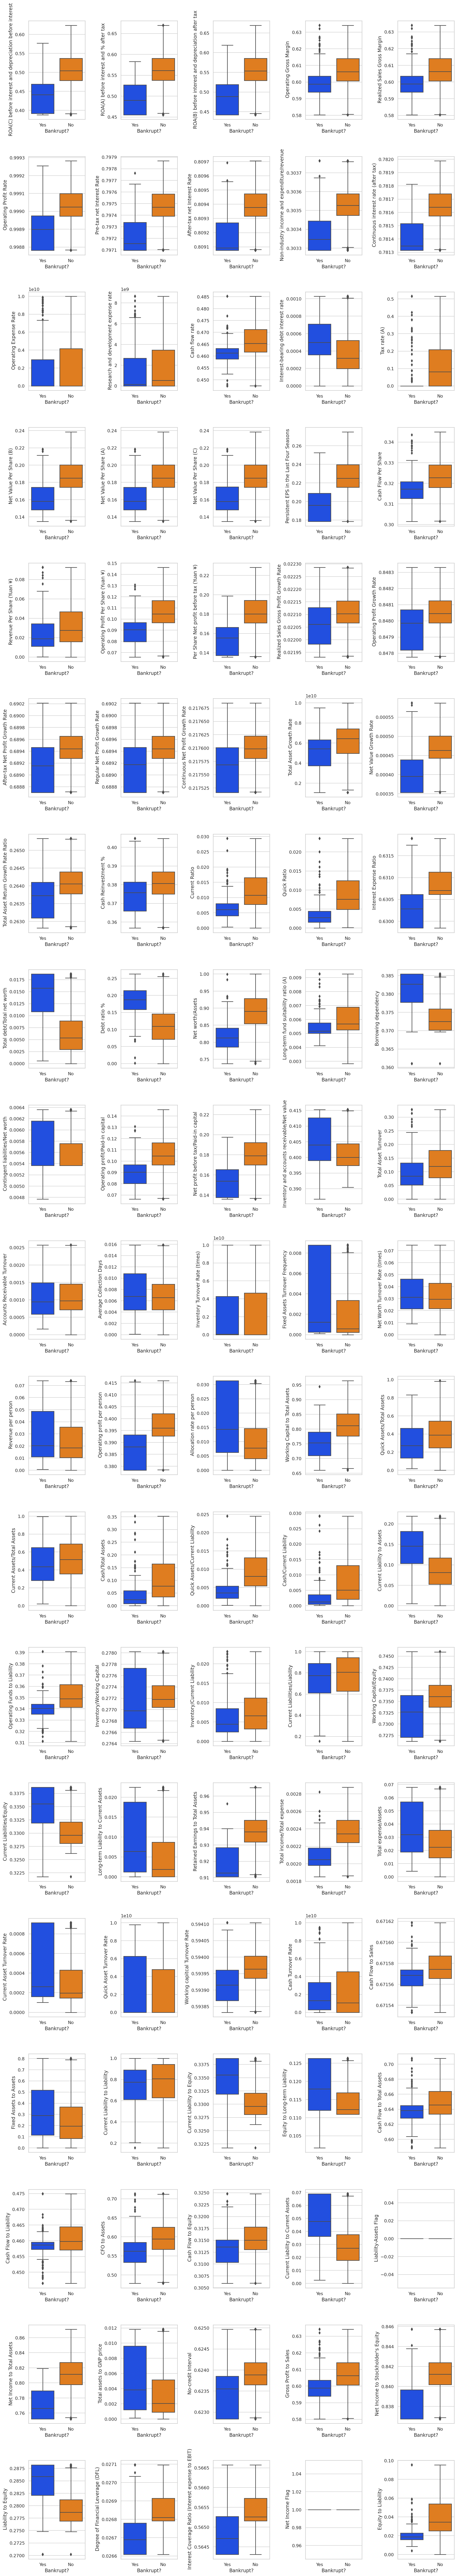

In [ ]:
fig, axs = plt.subplots(nrows=19, ncols=5, figsize=(16,90))
titles = list(data.select_dtypes(exclude=['object']))

ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.boxplot(x='Bankrupt?', y=title, data=data, ax=ax)
fig.tight_layout()

# Data Pre-Processing

## Data Encoding

In [ ]:
data['Bankrupt?'] = data['Bankrupt?'].replace({'No':0, 'Yes':1})

In [ ]:
data

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

## Resampling

In [ ]:
# Assign 'TARGET' column to y 
y = data['Bankrupt?'].values
# Assign all columns except 'TARGET' to X
X = data.drop(['Bankrupt?'], axis = 1).values

In [ ]:
# Check dimension
print('X shape :', X.shape)
print('y shape :', y.shape)

X shape : (6819, 95)
y shape : (6819,)


In [ ]:
# split data to train and test data
# with test size is 20% of overall data
# use stratified sampling
# and set RNG to 1000
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    stratify = y,
    random_state = 42
)

In [ ]:
# Make a new dataframe using train & test data
train_data_x = pd.DataFrame(X_train, columns=data.drop(['Bankrupt?'], axis = 1).columns)
train_data_y = pd.DataFrame(y_train, columns=['Bankrupt?'])
train_data = pd.concat([train_data_x, train_data_y], axis=1)

test_data_x = pd.DataFrame(X_test, columns=data.drop(['Bankrupt?'], axis = 1).columns)
test_data_y = pd.DataFrame(y_test, columns=['Bankrupt?'])
test_data = pd.concat([test_data_x, test_data_y], axis=1)

In [ ]:
train_data

ROA(C) before interest and depreciation before interest  \
0                                              0.493784          
1                                              0.534393          
2                                              0.526398          
3                                              0.469702          
4                                              0.391557          
...                                                 ...          
5450                                           0.550090          
5451                                           0.481597          
5452                                           0.622288          
5453                                           0.586847          
5454                                           0.500951          

       ROA(A) before interest and % after tax  \
0                                    0.550153   
1                                    0.590765   
2                                    0.586895   
3                                    0.536851   
4                                    0.443197   
...                                       ...   
5450                                 0.563890   
5451                                 0.528129   
5452                                 0.707697   
5453                                 0.642172   
5454                                 0.566616   

       ROA(B) before interest and depreciation after tax  \
0                                              0.544622    
1                                              0.573425    
2                                              0.566519    
3                                              0.521066    
4                                              0.432464    
...                                                 ...    
5450                                           0.593501    
5451                                           0.530007    
5452                                           0.689330    
5453                                           0.623374    
5454                                           0.550244    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.598524                      0.598524   
1                    0.599302                      0.599173   
2                    0.606740                      0.606740   
3                    0.595375                      0.595375   
4                    0.664495                      0.664495   
...                       ...                           ...   
5450                 0.602221                      0.602221   
5451                 0.605933                      0.605954   
5452                 0.614293                      0.603353   
5453                 0.609774                      0.609759   
5454                 0.608952                      0.608837   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998980                    0.797443   
1                   0.999023                    0.797454   
2                   0.999103                    0.797606   
3                   0.998967                    0.797390   
4                   0.995856                    0.794096   
...                      ...                         ...   
5450                0.999046                    0.797482   
5451                0.999021                    0.797349   
5452                0.998882                    0.799178   
5453                0.999064                    0.797540   
5454                0.999027                    0.797460   

       After-tax net Interest Rate  \
0                         0.809355   
1                         0.809359   
2                         0.809470   
3                         0.809313   
4                         0.806216   
...                            ...   
5450                      0.809400   
5451                      0.809262   
5452                      0.811001   
5453                      0.809426   
5454    

In [ ]:
test_data

ROA(C) before interest and depreciation before interest  \
0                                              0.503242          
1                                              0.485984          
2                                              0.554380          
3                                              0.663920          
4                                              0.450641          
...                                                 ...          
1359                                           0.485010          
1360                                           0.482328          
1361                                           0.522352          
1362                                           0.480330          
1363                                           0.450544          

       ROA(A) before interest and % after tax  \
0                                    0.556149   
1                                    0.547754   
2                                    0.618513   
3                                    0.692324   
4                                    0.509976   
...                                       ...   
1359                                 0.571849   
1360                                 0.539304   
1361                                 0.580844   
1362                                 0.547372   
1363                                 0.521860   

       ROA(B) before interest and depreciation after tax  \
0                                              0.552278    
1                                              0.530649    
2                                              0.609562    
3                                              0.709246    
4                                              0.495423    
...                                                 ...    
1359                                           0.533166    
1360                                           0.533915    
1361                                           0.563895    
1362                                           0.530917    
1363                                           0.509342    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.609399                      0.609399   
1                    0.598812                      0.598812   
2                    0.607857                      0.607886   
3                    0.630097                      0.630097   
4                    0.650492                      0.650226   
...                       ...                           ...   
1359                 0.596009                      0.596016   
1360                 0.601508                      0.601594   
1361                 0.599101                      0.599101   
1362                 0.596672                      0.596600   
1363                 0.595367                      0.595367   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.999043                    0.797445   
1                   0.999002                    0.797424   
2                   0.999043                    0.797758   
3                   0.999314                    0.797808   
4                   0.998738                    0.797212   
...                      ...                         ...   
1359                0.998993                    0.797445   
1360                0.998971                    0.797374   
1361                0.999025                    0.797482   
1362                0.998990                    0.797422   
1363                0.998903                    0.797253   

       After-tax net Interest Rate  \
0                         0.809349   
1                         0.809331   
2                         0.809638   
3                         0.809651   
4                         0.809081   
...                            ...   
1359                      0.809361   
1360                      0.809312   
1361                      0.809378   
1362                      0.809339   
1363    

## Normalization

In [ ]:
# Check train data
train_data

ROA(C) before interest and depreciation before interest  \
0                                              0.493784          
1                                              0.534393          
2                                              0.526398          
3                                              0.469702          
4                                              0.391557          
...                                                 ...          
5450                                           0.550090          
5451                                           0.481597          
5452                                           0.622288          
5453                                           0.586847          
5454                                           0.500951          

       ROA(A) before interest and % after tax  \
0                                    0.550153   
1                                    0.590765   
2                                    0.586895   
3                                    0.536851   
4                                    0.443197   
...                                       ...   
5450                                 0.563890   
5451                                 0.528129   
5452                                 0.707697   
5453                                 0.642172   
5454                                 0.566616   

       ROA(B) before interest and depreciation after tax  \
0                                              0.544622    
1                                              0.573425    
2                                              0.566519    
3                                              0.521066    
4                                              0.432464    
...                                                 ...    
5450                                           0.593501    
5451                                           0.530007    
5452                                           0.689330    
5453                                           0.623374    
5454                                           0.550244    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.598524                      0.598524   
1                    0.599302                      0.599173   
2                    0.606740                      0.606740   
3                    0.595375                      0.595375   
4                    0.664495                      0.664495   
...                       ...                           ...   
5450                 0.602221                      0.602221   
5451                 0.605933                      0.605954   
5452                 0.614293                      0.603353   
5453                 0.609774                      0.609759   
5454                 0.608952                      0.608837   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998980                    0.797443   
1                   0.999023                    0.797454   
2                   0.999103                    0.797606   
3                   0.998967                    0.797390   
4                   0.995856                    0.794096   
...                      ...                         ...   
5450                0.999046                    0.797482   
5451                0.999021                    0.797349   
5452                0.998882                    0.799178   
5453                0.999064                    0.797540   
5454                0.999027                    0.797460   

       After-tax net Interest Rate  \
0                         0.809355   
1                         0.809359   
2                         0.809470   
3                         0.809313   
4                         0.806216   
...                            ...   
5450                      0.809400   
5451                      0.809262   
5452                      0.811001   
5453                      0.809426   
5454    

In [ ]:
# Check descriptive stats for train data
train_data.describe()

ROA(C) before interest and depreciation before interest  \
count                                        5455.000000          
mean                                            0.504447          
std                                             0.060354          
min                                             0.024277          
25%                                             0.476113          
50%                                             0.502121          
75%                                             0.534612          
max                                             1.000000          

        ROA(A) before interest and % after tax  \
count                              5455.000000   
mean                                  0.557818   
std                                   0.065355   
min                                   0.000000   
25%                                   0.535379   
50%                                   0.559365   
75%                                   0.587958   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        5455.000000    
mean                                            0.552946    
std                                             0.061401    
min                                             0.033514    
25%                                             0.527143    
50%                                             0.551689    
75%                                             0.582740    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              5455.000000                   5455.000000   
mean                  0.607765                      0.607742   
std                   0.017047                      0.017028   
min                   0.000000                      0.000000   
25%                   0.600473                      0.600463   
50%                   0.605983                      0.605918   
75%                   0.613817                      0.613694   
max                   0.665151                      0.666023   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             5455.000000                 5455.000000   
mean                 0.998781                    0.797255   
std                  0.013556                    0.011467   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797462   
75%                  0.999092                    0.797576   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   5455.000000   
mean                       0.809178   
std                        0.010480   
min                        0.084286   
25%                        0.809311   
50%                        0.809374   
75%                        0.809467   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   5455.000000   
mean                                       0.303683   
std                                        0.011607   
min                                        0.062507   
25%                                        0.303467   
50%                                        0.303525   
75%                                        0.303583   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            5455.000000             5.455000e+03   
mean                                0.781451             1.976956e+09   
std                                 0.011093             3.225958e+09   
min                                 0.000000             0.000000e+00   
25%                                 0.781566             1.5686

In [ ]:
# Check test data
test_data

ROA(C) before interest and depreciation before interest  \
0                                              0.503242          
1                                              0.485984          
2                                              0.554380          
3                                              0.663920          
4                                              0.450641          
...                                                 ...          
1359                                           0.485010          
1360                                           0.482328          
1361                                           0.522352          
1362                                           0.480330          
1363                                           0.450544          

       ROA(A) before interest and % after tax  \
0                                    0.556149   
1                                    0.547754   
2                                    0.618513   
3                                    0.692324   
4                                    0.509976   
...                                       ...   
1359                                 0.571849   
1360                                 0.539304   
1361                                 0.580844   
1362                                 0.547372   
1363                                 0.521860   

       ROA(B) before interest and depreciation after tax  \
0                                              0.552278    
1                                              0.530649    
2                                              0.609562    
3                                              0.709246    
4                                              0.495423    
...                                                 ...    
1359                                           0.533166    
1360                                           0.533915    
1361                                           0.563895    
1362                                           0.530917    
1363                                           0.509342    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.609399                      0.609399   
1                    0.598812                      0.598812   
2                    0.607857                      0.607886   
3                    0.630097                      0.630097   
4                    0.650492                      0.650226   
...                       ...                           ...   
1359                 0.596009                      0.596016   
1360                 0.601508                      0.601594   
1361                 0.599101                      0.599101   
1362                 0.596672                      0.596600   
1363                 0.595367                      0.595367   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.999043                    0.797445   
1                   0.999002                    0.797424   
2                   0.999043                    0.797758   
3                   0.999314                    0.797808   
4                   0.998738                    0.797212   
...                      ...                         ...   
1359                0.998993                    0.797445   
1360                0.998971                    0.797374   
1361                0.999025                    0.797482   
1362                0.998990                    0.797422   
1363                0.998903                    0.797253   

       After-tax net Interest Rate  \
0                         0.809349   
1                         0.809331   
2                         0.809638   
3                         0.809651   
4                         0.809081   
...                            ...   
1359                      0.809361   
1360                      0.809312   
1361                      0.809378   
1362                      0.809339   
1363    

In [ ]:
# Check descriptive stats for test data
test_data.describe()

ROA(C) before interest and depreciation before interest  \
count                                        1364.000000          
mean                                            0.508111          
std                                             0.061929          
min                                             0.000000          
25%                                             0.477405          
50%                                             0.506142          
75%                                             0.540328          
max                                             0.818018          

        ROA(A) before interest and % after tax  \
count                              1364.000000   
mean                                  0.561851   
std                                   0.066597   
min                                   0.006923   
25%                                   0.536143   
50%                                   0.562991   
75%                                   0.593137   
max                                   0.984736   

        ROA(B) before interest and depreciation after tax  \
count                                        1364.000000    
mean                                            0.556159    
std                                             0.062320    
min                                             0.000000    
25%                                             0.527879    
50%                                             0.555089    
75%                                             0.588187    
max                                             0.814551    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              1364.000000                   1364.000000   
mean                  0.608681                      0.608680   
std                   0.016459                      0.016447   
min                   0.543183                      0.543183   
25%                   0.600275                      0.600250   
50%                   0.606142                      0.606138   
75%                   0.614244                      0.614105   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             1364.000000                 1364.000000   
mean                 0.998653                    0.796929   
std                  0.010550                    0.017382   
min                  0.612132                    0.160516   
25%                  0.998971                    0.797389   
50%                  0.999024                    0.797471   
75%                  0.999103                    0.797593   
max                  0.999650                    0.850681   

        After-tax net Interest Rate  \
count                   1364.000000   
mean                       0.808705   
std                        0.022038   
min                        0.000000   
25%                        0.809314   
50%                        0.809382   
75%                        0.809479   
max                        0.864386   

        Non-industry income and expenditure/revenue  \
count                                   1364.000000   
mean                                       0.303382   
std                                        0.009176   
min                                        0.000000   
25%                                        0.303460   
50%                                        0.303526   
75%                                        0.303595   
max                                        0.446321   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            1364.000000             1.364000e+03   
mean                                0.781104             2.068898e+09   
std                                 0.017654             3.284327e+09   
min                                 0.133479             1.002568e-04   
25%                                 0.781568             1.5654

In [ ]:
# Reseparate independent and dependent feature of the train-test data
X_train = train_data.drop(['Bankrupt?'], axis=1)
y_train = train_data['Bankrupt?']

X_test = test_data.drop(['Bankrupt?'], axis=1)
y_test = test_data['Bankrupt?']

# Modeling

In [ ]:
# Model assignment
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=100)
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier() 
gbc = GradientBoostingClassifier()
bgc = BaggingClassifier()
knn = KNeighborsClassifier(n_neighbors = 3) 
logreg = LogisticRegression(solver='liblinear')
nb = GaussianNB()
svm = SVC()
xgb = XGBClassifier(eval_metric='mlogloss')
mlp = MLPClassifier()

# Assign model to a list
models = [dtc, rfc, abc, etc, gbc, bgc, knn, logreg, nb, svm, xgb, mlp]
models = [logreg, knn, nb, dtc, rfc, abc, etc, gbc, bgc, svm, mlp, xgb]
model_name = []

# Get Classifier names for every model
for name in models:
    names = str(type(name)).split('.')[-1][:-2]
    # Append classifier names to model_name list
    model_name.append(names)

### Cross Validation

In [ ]:
# Cross validation for each model 
dtc_score = cross_val_score(models[0], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(models[1], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
abc_score = cross_val_score(models[2], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
etc_score = cross_val_score(models[3], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
gbc_score = cross_val_score(models[4], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
bgc_score = cross_val_score(models[5], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
knn_score = cross_val_score(models[6], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
logreg_score = cross_val_score(models[7], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
nb_score = cross_val_score(models[8], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
svm_score = cross_val_score(models[9], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
xgb_score = cross_val_score(models[10], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
mlp_score = cross_val_score(models[11], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

In [ ]:
# List of score per model
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Create dataframe for score every k-fold
df_cv_result = pd.DataFrame(cv_result, index=model_name)
df_cv_result

0         1         2         3         4
LogisticRegression          0.000000  0.000000  0.000000  0.042553  0.000000
KNeighborsClassifier        0.139535  0.095238  0.095238  0.000000  0.000000
GaussianNB                  0.063985  0.062271  0.059837  0.062963  0.064103
DecisionTreeClassifier      0.285714  0.341463  0.272727  0.365854  0.342105
RandomForestClassifier      0.285714  0.304348  0.227273  0.190476  0.142857
AdaBoostClassifier          0.392857  0.516129  0.170213  0.320000  0.222222
ExtraTreesClassifier        0.318182  0.279070  0.150000  0.232558  0.139535
GradientBoostingClassifier  0.437500  0.333333  0.226415  0.346154  0.217391
BaggingClassifier           0.222222  0.400000  0.192308  0.307692  0.086957
SVC                         0.000000  0.000000  0.000000  0.000000  0.000000
MLPClassifier               0.042254  0.060606  0.070588  0.029412  0.122449
XGBClassifier               0.423077  0.464286  0.186047  0.448980  0.170213

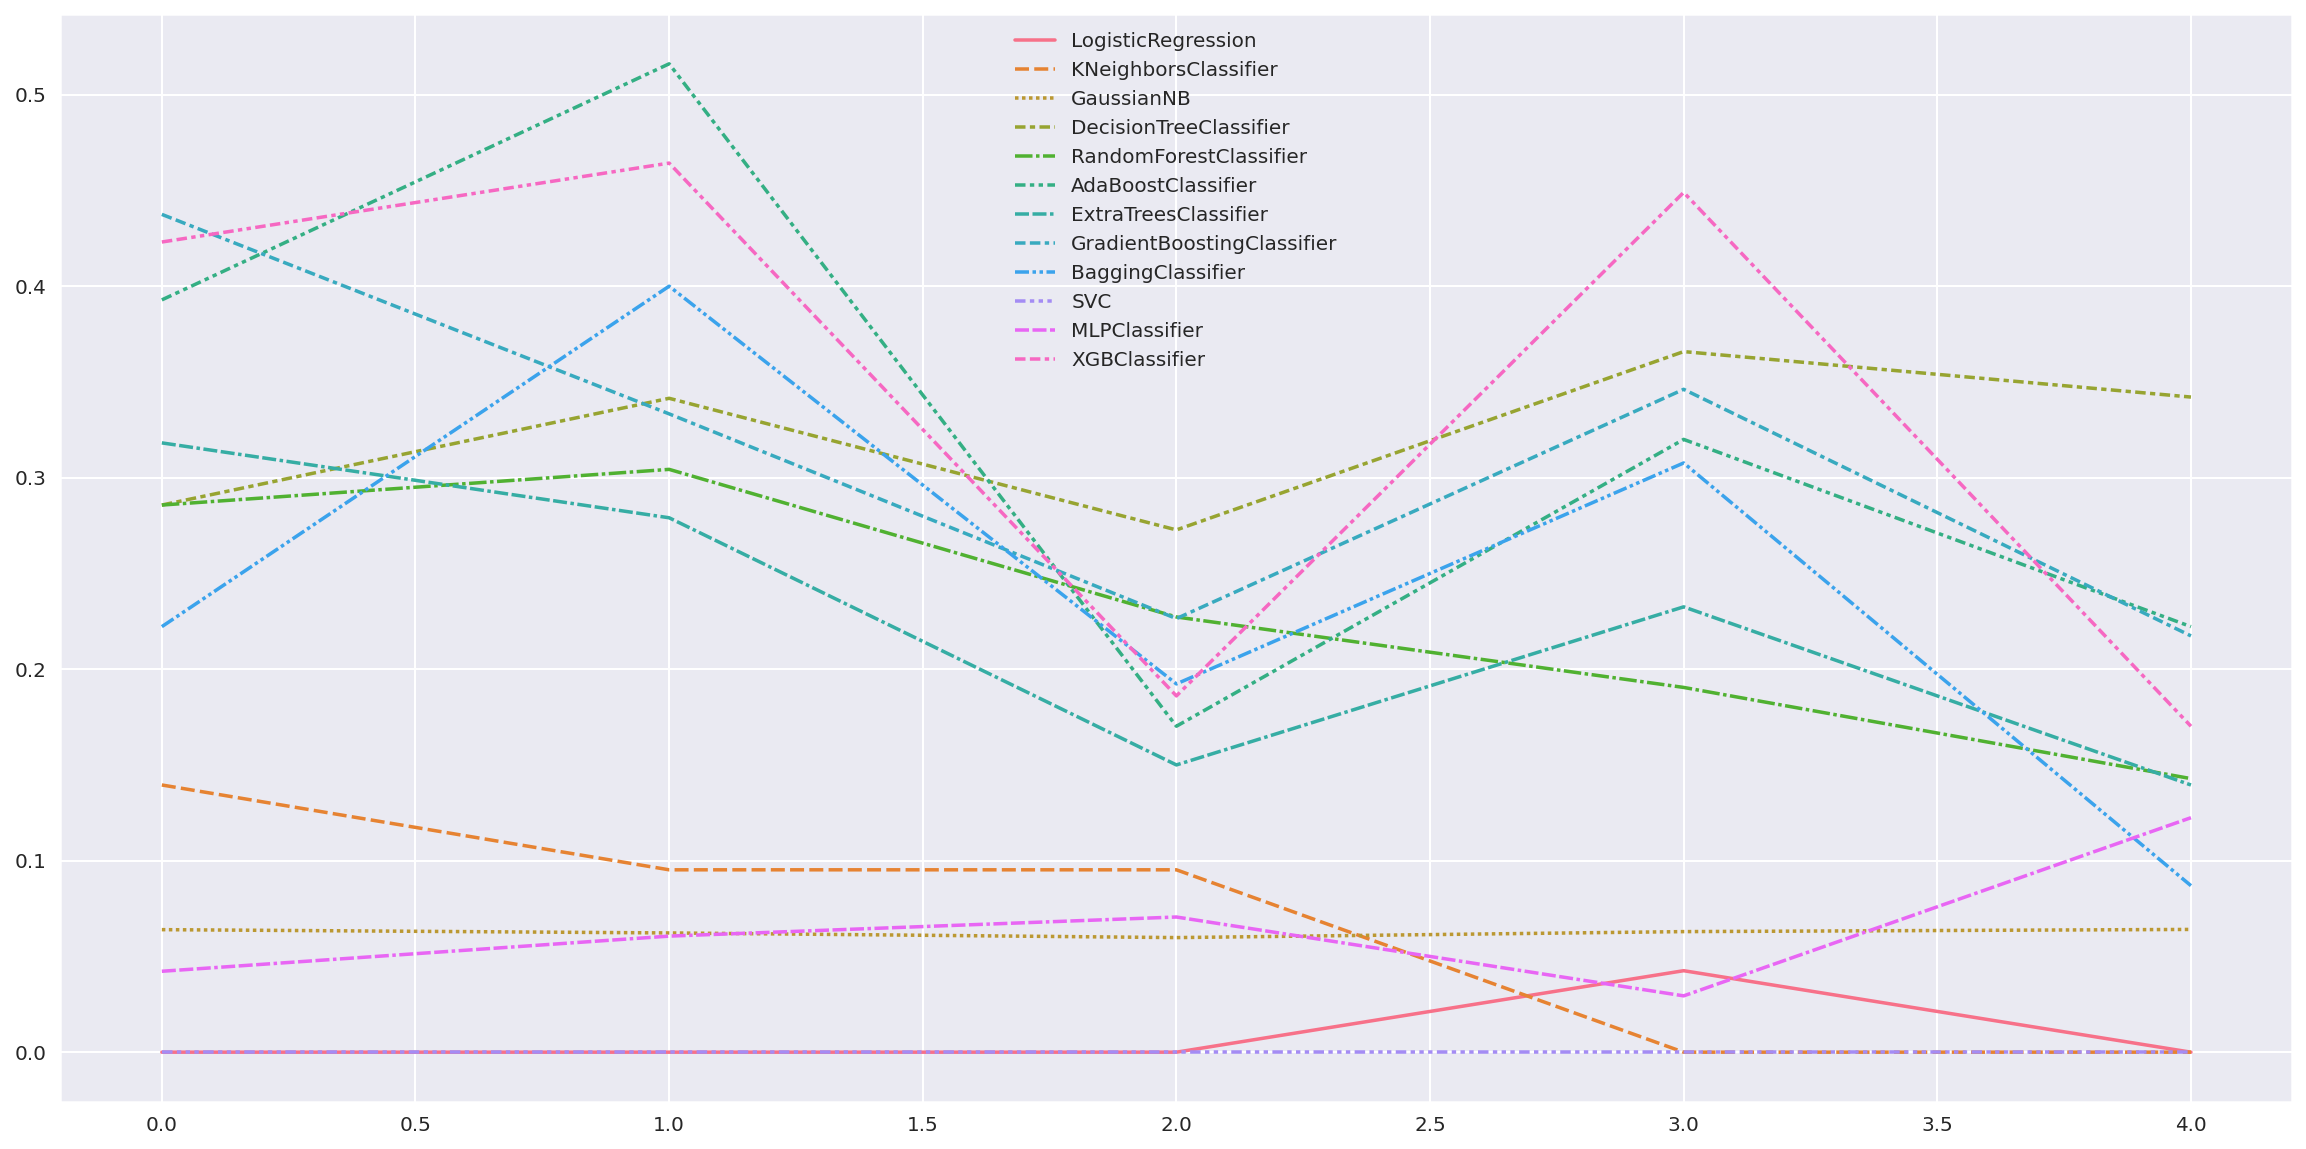

In [ ]:
# Plot cross validation score
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.lineplot(data=df_cv_result.T)
plt.show()

In [ ]:
# Calculate average for every k-fold validation
cv_mean = []
i = 0
for mean in cv_result:
    mean = cv_result[i].mean()
    cv_mean.append(mean)
    i += 1

In [ ]:
# Calculate standard deviation for every k-fold validation
cv_std = []
i = 0 
for std in cv_result:
    std = cv_result[i].std()
    cv_std.append(std)
    i += 1

In [ ]:
# Average and standard deviation score for each model
df_cv = pd.DataFrame({'score_mean':cv_mean, 'score_std':cv_std}, index=model_name).sort_values(['score_mean', 'score_std'], ascending=[False, True])
df_cv

score_mean  score_std
XGBClassifier                 0.338520   0.131715
AdaBoostClassifier            0.324284   0.123028
DecisionTreeClassifier        0.321573   0.035916
GradientBoostingClassifier    0.312159   0.082033
BaggingClassifier             0.241836   0.105998
RandomForestClassifier        0.230134   0.059657
ExtraTreesClassifier          0.223869   0.070123
KNeighborsClassifier          0.066002   0.056266
MLPClassifier                 0.065062   0.032046
GaussianNB                    0.062632   0.001552
LogisticRegression            0.008511   0.017021
SVC                           0.000000   0.000000

### Fit and Evaluation


In [ ]:
# Create a list to assign a model score
train_score = []
test_score = []

# Create dataframe
df_train_test = pd.DataFrame()
for i in models:
    # Fit each model
    model = i.fit(X_train, y_train)
    # accuracy for training set
    train_score.append(model.score(X_train, y_train))
    # accuracy for testing set
    test_score.append(model.score(X_test, y_test))

In [ ]:
# Create a dataframe to store accuracy score
df_avg_score = pd.DataFrame({
    'train score':train_score,
    'test score':test_score},
    index=model_name)

# Create a new column for the difference in accuracy score 
df_avg_score['difference'] = abs(df_avg_score['train score'] - df_avg_score['test score'])
# Sort accuracy by smallest difference
df_avg_score = df_avg_score.sort_values(['train score', 'test score','difference'], ascending=[False, False, True])
df_avg_score

train score  test score  difference
RandomForestClassifier         1.000000    0.971408    0.028592
ExtraTreesClassifier           1.000000    0.970674    0.029326
DecisionTreeClassifier         1.000000    0.966276    0.033724
BaggingClassifier              0.997250    0.973607    0.023643
GradientBoostingClassifier     0.992484    0.969941    0.022543
XGBClassifier                  0.987901    0.973607    0.014294
AdaBoostClassifier             0.975619    0.966276    0.009343
KNeighborsClassifier           0.971769    0.962610    0.009159
SVC                            0.967736    0.967742    0.000006
LogisticRegression             0.961137    0.959677    0.001459
MLPClassifier                  0.898992    0.879765    0.019226
GaussianNB                     0.062145    0.061584    0.000561

### Cross Validation for Some Metrics

In [ ]:
# Cross validation for each model
dtc_score = cross_validate(models[0], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
rfc_score = cross_validate(models[1], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
abc_score = cross_validate(models[2], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
etc_score = cross_validate(models[3], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
gbc_score = cross_validate(models[4], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
bgc_score = cross_validate(models[5], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
knn_score = cross_validate(models[6], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
logreg_score = cross_validate(models[7], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
nb_score = cross_validate(models[8], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
svm_score = cross_validate(models[9], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
xgb_score = cross_validate(models[10], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
mlp_score = cross_validate(models[11], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

In [ ]:
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Average score for each metrics
df_cv_result = pd.DataFrame(cv_result, index=model_name).applymap(np.mean)
df_cv_result = df_cv_result.sort_values(['test_f1'], ascending=False)
df_cv_result = df_cv_result.reset_index()
df_cv_result.rename(columns={'index':'Model'}, inplace=True)
df_cv_result

Model   fit_time  score_time  test_roc_auc   test_f1
0                XGBClassifier   4.547560    0.024272      0.939581  0.338520
1           AdaBoostClassifier   3.541472    0.093214      0.909126  0.324284
2       DecisionTreeClassifier   0.854165    0.010827      0.664147  0.315039
3   GradientBoostingClassifier  17.499885    0.016666      0.933377  0.306755
4            BaggingClassifier   4.637453    0.029318      0.834118  0.223447
5       RandomForestClassifier   3.504482    0.078226      0.921646  0.222096
6         ExtraTreesClassifier   0.749833    0.105200      0.934380  0.191470
7                MLPClassifier   2.343767    0.017444      0.532943  0.096356
8         KNeighborsClassifier   0.009190    0.359945      0.581754  0.066002
9                   GaussianNB   0.021656    0.023254      0.631865  0.062632
10          LogisticRegression   0.360807    0.011534      0.589494  0.008511
11                         SVC   0.676271    0.292685      0.558351  0.000000

### Default Parameter

In [ ]:
# Fit classifier
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)

# predict test set
y_pred_def = xgb.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
train_score_def = round((xgb.score(X_train, y_train) * 100), 2)
test_score_def = round((xgb.score(X_test, y_test) * 100), 2)
prec_score_def = round((precision_score(y_test, y_pred_def)) * 100, 2)
recall_score_def = round((recall_score(y_test, y_pred_def)) * 100, 2)
f1_def = round(f1_score(y_test, y_pred_def)*100, 2)

print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('Precision Score : {}%'.format(prec_score_def))
print('Recall Score : {}%'.format(recall_score_def))
print('F1 Score : {}%'.format(f1_def))

Training Accuracy : 98.79%
Test Accuracy : 97.36%
Precision Score : 66.67%
Recall Score : 36.36%
F1 Score : 47.06%


# Model Evaluation

In [ ]:
# XGBoost Prediction
xgb_pred = xgb.predict(X_test)
xgb_pred_proba = xgb.predict_proba(X_test)

### Classification Report

In [ ]:
# XGBoost prediction result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['0','1'], output_dict=True))

0          1  accuracy    macro avg  weighted avg
precision     0.979104   0.666667  0.973607     0.822886      0.969026
recall        0.993939   0.363636  0.973607     0.678788      0.973607
f1-score      0.986466   0.470588  0.973607     0.728527      0.969825
support    1320.000000  44.000000  0.973607  1364.000000   1364.000000

### Confusion Matrix

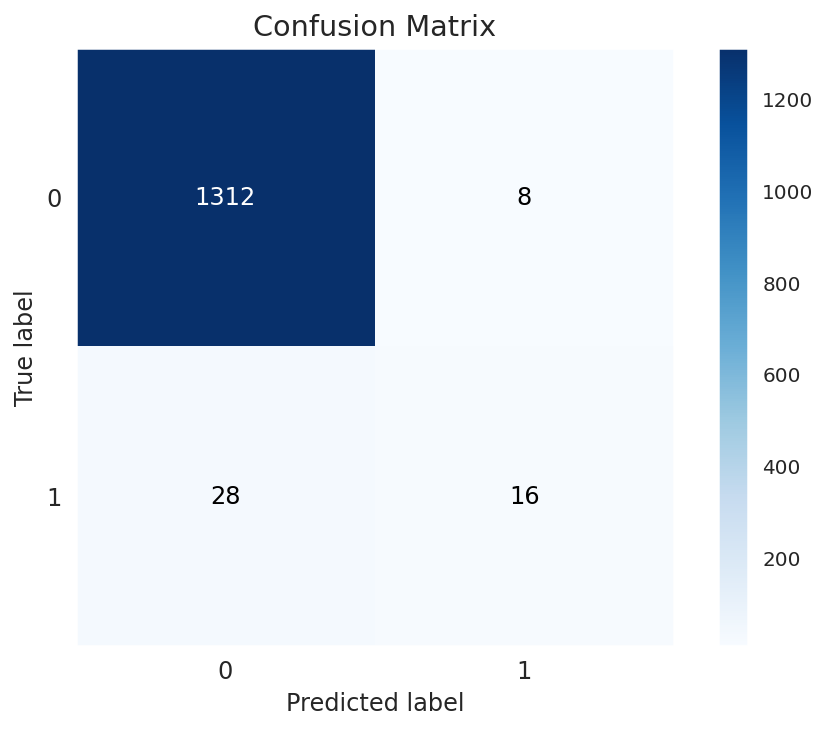

In [ ]:
# xgboost result
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred);

### ROC-AUC

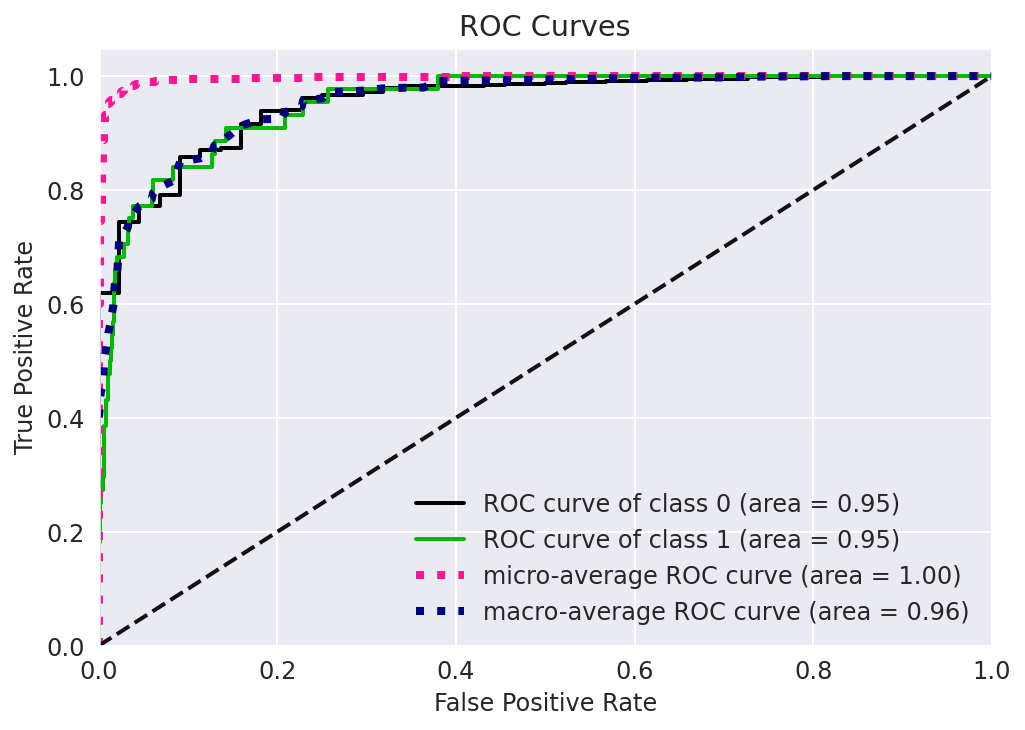

In [ ]:
# XGBoost perceptron result
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

### AOC Score

In [ ]:
# check XGBoost f1-score
metrics.roc_auc_score(y_test, xgb_pred)

0.6787878787878788

### Precision

In [ ]:
# check XGBoost f1-score
metrics.precision_score(y_test, xgb_pred)

0.6666666666666666

### Recall

In [ ]:
# check XGBoost f1-score
metrics.recall_score(y_test, xgb_pred)

0.36363636363636365

### F1-Score

In [ ]:
# check XGBoost f1-score
metrics.f1_score(y_test, xgb_pred)

0.4705882352941177

# Imbalanced Modelling using G-Means

## XGBoost

In [ ]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, xgb_pred_proba[:,1])

# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

# find the best threshold
ix = np.argmax(gmeans)

print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.018308499827980995, G-Mean=0.8829577142020282


In [ ]:
# change predict proba result to optimized one using new threshold
new_pred_result = (xgb_pred_proba[:,1] >= thresholds[ix]).astype(int)

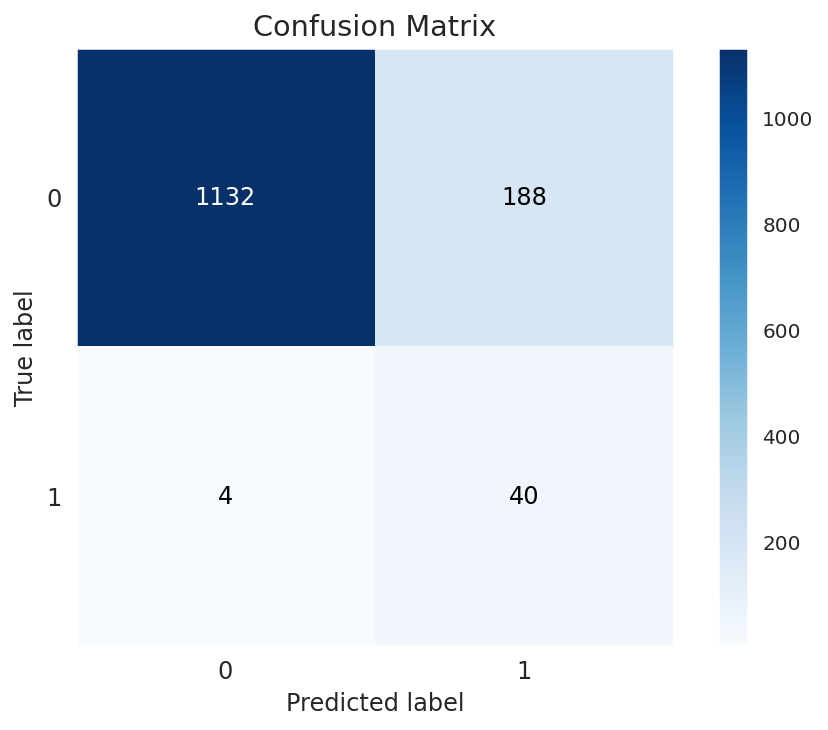

In [ ]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

In [ ]:
# check new ROC-AUC
metrics.roc_auc_score(y_test, new_pred_result)

0.8833333333333334

In [ ]:
# check new precision
metrics.precision_score(y_test, new_pred_result)

0.17543859649122806

In [ ]:
# check new recall
metrics.recall_score(y_test, new_pred_result)

0.9090909090909091

In [ ]:
# check new f1-score
metrics.f1_score(y_test, new_pred_result)

0.2941176470588235

In [ ]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['0','1'], output_dict=True))

0          1  accuracy    macro avg  weighted avg
precision     0.996479   0.175439  0.859238     0.585959      0.969994
recall        0.857576   0.909091  0.859238     0.883333      0.859238
f1-score      0.921824   0.294118  0.859238     0.607971      0.901576
support    1320.000000  44.000000  0.859238  1364.000000   1364.000000

# Model Interpretation

### Variable Importance - Partial Dependence Plot

In [ ]:
## initiate explainer for Random Forest model
exp = dx.Explainer(xgb, X_train, y_train, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 5455 rows 95 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 5455 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x7fefefcb3830> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.000188, mean = 0.0323, max = 0.977
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.658, mean = -6.24e-06, max = 0.952
  -> model_info        : package xgboost

A new explainer has been created!


In [ ]:
# visualize permutation feature importance for XGBoost model
exp.model_parts().plot()

From the plot above, we know that 5 highest importance variable is `incident_severity` , `policy_annual_premium`, `collision_type_Rear Collision`, `capital_gains`, `total_claim_amount`. 

In [ ]:
# create partial dependence plot of XGBoost model
exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 95/95 [00:15<00:00,  6.21it/s]


# Business Evaluation Metrics

### Gain Cumulative Curve

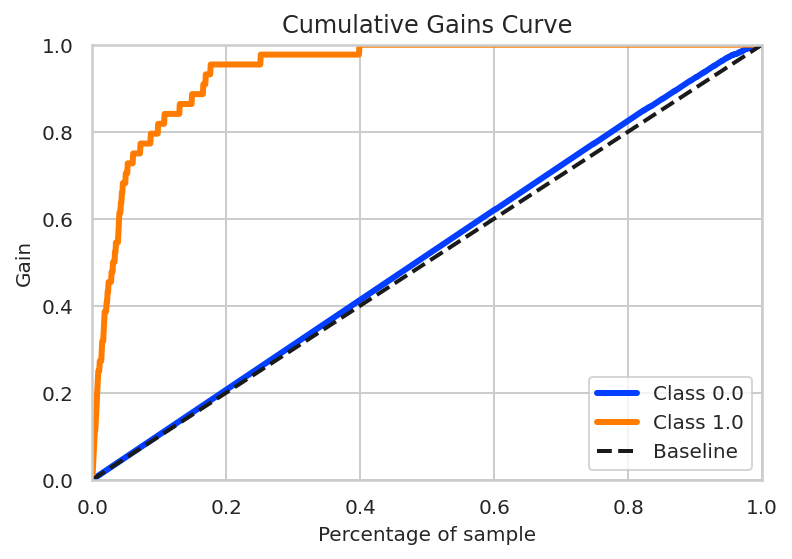

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, xgb_pred_proba)

### Lift Curve

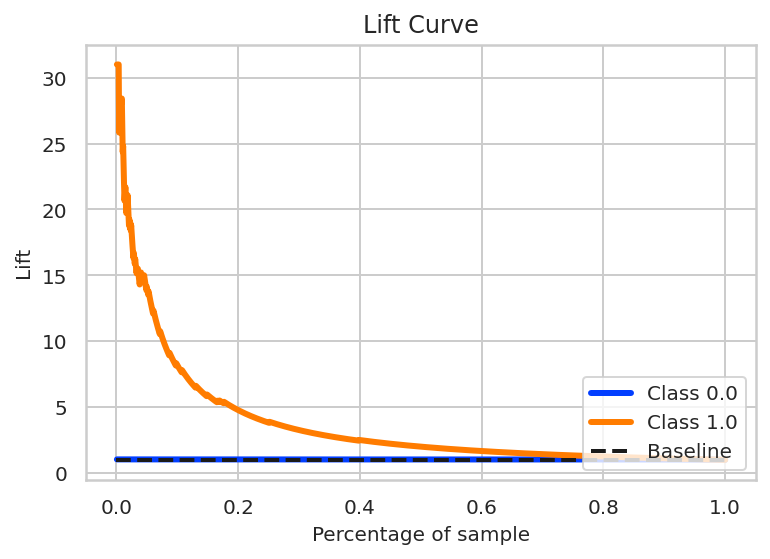

In [ ]:
skplt.metrics.plot_lift_curve(y_test, xgb_pred_proba)

### Profit Curve

In [ ]:
def standard_confusion_matrix(y_true, y_pred):
    '''
    Reformat confusion matrix output from sklearn for plotting profit curve.
    '''
    [[tn, fp], [fn, tp]] = metrics.confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

def plot_profit_curve(model_object, costbenefit_mat, y_proba, y_test):
    '''
    Plot profit curve.

    INPUTS:
    - model object
    - cost benefit matrix in the same format as the confusion matrix above
    - predicted probabilities
    - actual labels
    '''

    # Profit curve data
    profits = [] # one profit value for each T (threshold)
    thresholds = sorted(y_proba, reverse=True)

    # For each threshold, calculate profit - starting with largest threshold
    for T in thresholds:
        y_pred = (y_proba > T).astype(int)
        confusion_mat = metrics.confusion_matrix(y_test, y_pred)
        # Calculate total profit for this threshold
        profit = sum(sum(confusion_mat * costbenefit_mat)) / len(y_test)
        profits.append(profit)

    print(profits)
    # Profit curve plot
    model_name = model_object.__class__.__name__
    max_profit = max(profits)
    plt.plot(np.linspace(0, 1, len(y_test)), profits, label = '{}, max profit ${:.2f} per user'.format(model_name, max_profit))


In [ ]:
# create cost benefit matrix
costbenefit_mat = np.array([[0, -10000],
                            [0, 30000 - 10000]])

In [ ]:
# check cost benefit matrix
costbenefit_mat

array([[     0, -10000],
       [     0,  20000]])

In [ ]:
# check model confusion matrix
metrics.confusion_matrix(y_test, xgb_pred)

array([[1312,    8],
       [  30,   14]])

In [ ]:
# XGBoost
xgb = XGBClassifier()

# xgb_params
xgb_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3,5,10,'None'],
    'learning_rate': [0.1, 0.05, 0.01],
    'grow_policy': ['depthwise', 'lossguide']
}

# define model with GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb, 
    param_grid=xgb_params, 
    n_jobs=1, 
    verbose=1,
    cv = 5,
    scoring = "f1"
)

# fitting gridsearch
grid_search.fit(X_train, y_train)

# check the best estimator
grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


XGBClassifier(grow_policy='depthwise')

In [ ]:
# assign the best estimator to new variable
tree_best = grid_search.best_estimator_

[0.0, 14.662756598240469, 29.325513196480937, 21.994134897360702, 36.65689149560117, 29.325513196480937, 43.988269794721404, 36.65689149560117, 29.325513196480937, 43.988269794721404, 36.65689149560117, 51.31964809384164, 65.98240469208211, 80.64516129032258, 95.30791788856305, 87.97653958944281, 102.63929618768329, 117.30205278592375, 131.96480938416423, 124.633431085044, 117.30205278592375, 109.97067448680352, 102.63929618768329, 117.30205278592375, 109.97067448680352, 124.633431085044, 139.29618768328444, 153.95894428152494, 146.6275659824047, 139.29618768328444, 131.96480938416423, 146.6275659824047, 139.29618768328444, 131.96480938416423, 124.633431085044, 139.29618768328444, 131.96480938416423, 124.633431085044, 117.30205278592375, 109.97067448680352, 102.63929618768329, 95.30791788856305, 109.97067448680352, 102.63929618768329, 95.30791788856305, 109.97067448680352, 124.633431085044, 117.30205278592375, 109.97067448680352, 124.633431085044, 139.29618768328444, 131.96480938416423

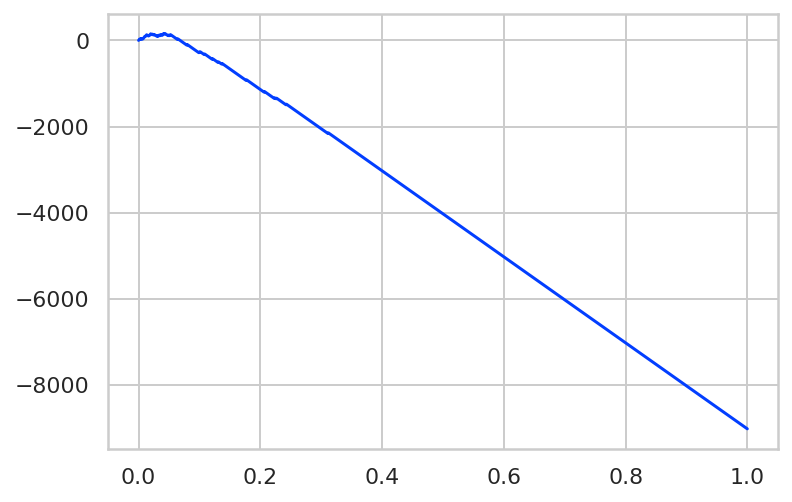

In [ ]:
plot_profit_curve(tree_best,costbenefit_mat, lr_pred_proba[:,1], y_test)

[0.0, 14.662756598240469, 29.325513196480937, 21.994134897360702, 36.65689149560117, 29.325513196480937, 43.988269794721404, 36.65689149560117, 29.325513196480937, 43.988269794721404, 36.65689149560117, 51.31964809384164, 65.98240469208211, 80.64516129032258, 95.30791788856305, 87.97653958944281, 102.63929618768329, 117.30205278592375, 131.96480938416423, 124.633431085044, 117.30205278592375, 109.97067448680352, 102.63929618768329, 117.30205278592375, 109.97067448680352, 124.633431085044, 139.29618768328444, 153.95894428152494, 146.6275659824047, 139.29618768328444, 131.96480938416423, 146.6275659824047, 139.29618768328444, 131.96480938416423, 124.633431085044, 139.29618768328444, 131.96480938416423, 124.633431085044, 117.30205278592375, 109.97067448680352, 102.63929618768329, 95.30791788856305, 109.97067448680352, 102.63929618768329, 95.30791788856305, 109.97067448680352, 124.633431085044, 117.30205278592375, 109.97067448680352, 124.633431085044, 139.29618768328444, 131.96480938416423

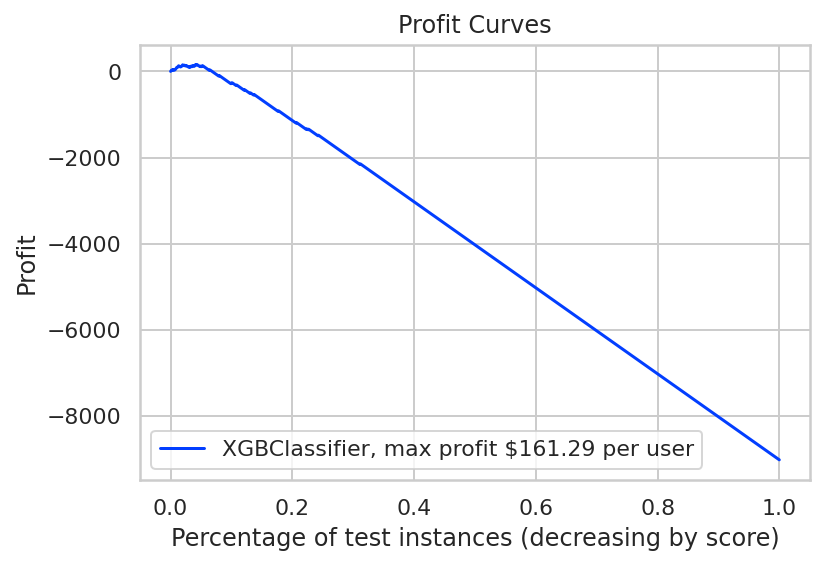

In [ ]:
plot_profit_curve(tree_best,costbenefit_mat, lr_pred_proba[:,1], y_test)
plt.xlabel('Percentage of test instances (decreasing by score)')
plt.ylabel('Profit')
plt.title('Profit Curves')
plt.legend(loc='lower left')
plt.show()